#### Figure 2

##### Package imports, figure settings, color definitions
<img src="color_pal.png" width="500">

/Users/mlanghinrichs/Documents/Studium/MSc/09_hiwi_hoefer/01_project/memo_py/memo_py/selection.py:18: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


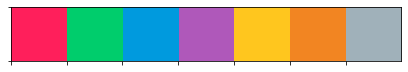

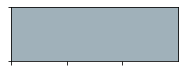

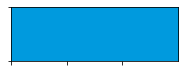

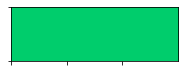

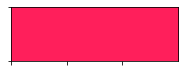

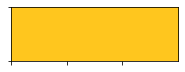

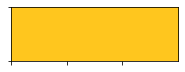

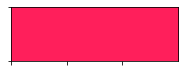

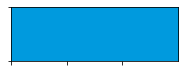

In [1]:
%matplotlib inline
%run settings_load.py

##### Figure 2

In [7]:
# example parameter posterior
res = pickle.load(open('in_silico_files/estimation_in_silico_data_cd44_sigma022_min2.pickle', 'rb'))

In [8]:
net_names = [est.net.net_name for est in res]
model_probs = me.selection.compute_model_probabilities(res)
log_evids = [est.bay_est_log_evidence for est in res]

sort_inds = np.array(- model_probs).argsort()
net_names_sorted = np.array(net_names)[sort_inds]
model_probs_sorted = np.array(model_probs)[sort_inds]
log_evids_sorted = np.array(log_evids)[sort_inds]

print(model_probs_sorted[:10])
print(log_evids_sorted[:10])
print(net_names_sorted[:10])

[0.06392081 0.06022008 0.05945486 0.05705106 0.05662379 0.05570246
 0.05419261 0.05182397 0.05162547 0.04502167]
[193.14687061 193.0872315  193.0744431  193.03317235 193.025655
 193.00925    192.98177034 192.93707841 192.93324081 192.79636953]
['net_5_17' 'net_5_19' 'net_5_20' 'net_5_14' 'net_5_18' 'net_5_15'
 'net_5_16' 'net_5_13' 'net_5_12' 'net_5_11']


In [14]:
print(net_names.index('net_5_17'))

36


In [9]:
print(res[0].net.net_name, res[0].bay_est_log_evidence)

net_4_1 68.84997093193375


In [35]:
# # looks all good (compare run with a newer memopy version)
# res_compare = pickle.load(open('estimation_count_data_cd44_filtered_sigma022_minimal2_multiedge.pickle', 'rb'))
# print([est.net.net_name for est in res] == [est.net.net_name for est in res_compare])
# print(np.all(np.array([est.data_mean_values for est in res]) == np.array([est.data_mean_values for est in res_compare])))
# print(np.all(np.array([est.data_var_values for est in res]) == np.array([est.data_var_values for est in res_compare])))
# print(np.all(np.array([est.data_cov_values for est in res]) == np.array([est.data_cov_values for est in res_compare])))
# print([est.bay_log_likelihood_norm for est in res] == [est.bay_log_likelihood_norm for est in res_compare])
# print([est.net_simulation.sim_moments.moment_eqs for est in res] == [est.net_simulation.sim_moments.moment_eqs for est in res_compare])
# print([est.net_simulation.sim_moments.moment_eqs_template_str for est in res] == [est.net_simulation.sim_moments.moment_eqs_template_str for est in res_compare])

# plt.figure()
# plt.scatter([est.bay_est_log_evidence for est in res], [est.bay_est_log_evidence for est in res_compare])

# print(stats.pearsonr([est.bay_est_log_evidence for est in res], [est.bay_est_log_evidence for est in res_compare]))
# print(stats.spearmanr([est.bay_est_log_evidence for est in res], [est.bay_est_log_evidence for est in res_compare]))

# plt.figure()
# plt.scatter([est.bay_est_log_likelihood_max for est in res], [est.bay_est_log_likelihood_max for est in res_compare])
# res[0].bay_est_log_likelihood_max
# print(stats.pearsonr([est.bay_est_log_likelihood_max for est in res], [est.bay_est_log_likelihood_max for est in res_compare]))
# print(stats.spearmanr([est.bay_est_log_likelihood_max for est in res], [est.bay_est_log_likelihood_max for est in res_compare]))

# for est1, est2 in zip(res, res_compare):
# #     print(est1.net.net_name, est1.bay_est_log_evidence, est2.bay_est_log_evidence)
#     print(est1.net.net_name, est1.bay_est_log_likelihood_max, est2.bay_est_log_likelihood_max)

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5, 18.5, 19.5]),
 <a list of 20 Text major ticklabel objects>)

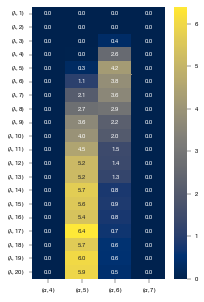

In [11]:
steps_list = range(1, 11) # 11, 21

steps_lambda = range(1, 21) # range(1, 21) # [5, 10, 15, 20, 25, 30, 35, 40, 50, 60, 70, 80]
steps_alpha = range(4, 8) # range(4, 8) # [3]
rows = [fr'$(\lambda, {i})$' for i in steps_lambda] # steps_list # range(1, 21)]
cols = [fr'$(\alpha, {i})$' for i in steps_alpha] # steps_list # range(1, 6)]

model_probs_2d = np.zeros((len(rows), len(cols)))

for i, row_step in enumerate(rows):
    for j, col_step in enumerate(cols):
        name = f'net_{steps_alpha[j]}_{steps_lambda[i]}'
        net_index = net_names.index(name)
        model_probs_2d[i, j] = model_probs[net_index]

df = pd.DataFrame(model_probs_2d * 100.0, index=rows, columns=cols)

plt.figure(figsize=(3, 5)) # 8, 4 or 6, 8
sns.heatmap(df, cmap='cividis', annot=True, fmt='.1f') # 'plasma' # annot=True
plt.yticks(rotation=0, va='center')
# plt.savefig('paper_figures/model_probs_cd44_minimal2.pdf')

In [23]:
est = res[36]

# repair old memopy version
est.net_simulation_credible_band_exists = False
est.data.data_mean_exists_only = False

# me.plots.est_bestfit_mean_plot(res[36])
# me.plots.est_bestfit_variance_plot(res[36])
# me.plots.est_bestfit_covariance_plot(res[36])
# me.plots.est_corner_kernel_plot(est)

est.

SyntaxError: invalid syntax (<ipython-input-23-da9bda0cdbad>, line 12)

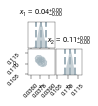

In [69]:
import dynesty
from dynesty import plotting as dyplot

fig, axes = dyplot.cornerplot(est.bay_nested_sampler_res, color=grey,
                            show_titles=True,
                            title_fmt='.2f', 
                            max_n_ticks=3,
                            hist_kwargs={'histtype':'stepfilled', 'linewidth':'0.8'},
                            hist2d_kwargs={'linewidth':'0.8'})
fig.set_size_inches(1.0, 1.0, forward=True)
plt.savefig('paper_figures/memocell_corner.pdf', bbox_inches='tight')

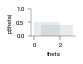

In [70]:
# parameter priors
plt.rcParams.update({'figure.figsize': (0.8, 0.5)})
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)

plt.fill_between([0, 2], [0, 0], [0.5, 0.5], color=grey, alpha=0.25, linewidth=0)
plt.fill_between([0.5, 3], [0, 0], [1/2.5, 1/2.5], color=grey, alpha=0.25, linewidth=0)
# plt.plot([0, 2], [0.5, 0.5], color='#A0B1BA', zorder=100, linewidth=0.8)
# plt.plot([0.5, 3], [1/2.5, 1/2.5], color='#A0B1BA', zorder=100, linewidth=0.8)

plt.ylim((0, 1))
plt.xlim((-0.2, 3.2))
plt.xlabel('theta')
plt.ylabel('p(theta)')
plt.savefig(f'paper_figures/memocell_priors.pdf', bbox_inches='tight')

7


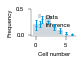

In [155]:
# poisson count data
from scipy.stats import poisson
np.random.seed(5)

lamprior = 2
data = np.random.poisson(lam=lamprior, size=20)

# prior (λprior=8)
# Gamma(λprior, 1)
# posterior (analytical)
# Gamma(λprior + sum(data), 1/(length(data)+1))
gamma_samples = np.random.gamma(lamprior + np.sum(data), 1/(len(data)+1), 10000)
xvals = [n for n in range(0, 7)]
print(len(xvals))
poisson_samples = np.array([poisson.pmf(xvals, s) for s in gamma_samples])

poisson_upper = np.percentile(poisson_samples, 97.5, axis=0)
poisson_median = np.percentile(poisson_samples, 50, axis=0)
poisson_lower = np.percentile(poisson_samples, 2.5, axis=0)

errlow = poisson_median-poisson_lower
errupp = poisson_upper-poisson_median

plt.rcParams.update({'figure.figsize': (0.8, 0.5)})
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)

plt.hist(data, color=grey, alpha=0.5, density=True, label='Data',
        bins=np.linspace(-0.5, len(xvals)-0.5, num=len(xvals)+1))

plt.errorbar(xvals, poisson_median, yerr=np.array([errlow, errupp]),
             color=cnaive, linewidth=1.0, capsize=1.0,
             zorder=100, markersize=2, fmt='.', label='Inference')
leg = plt.legend()
plt.legend(frameon=False)
plt.ylim(-0.02, 0.5)
plt.xlim(-0.7, len(xvals)-0.3)
plt.xlabel("Cell number")
plt.ylabel("Frequency")
plt.savefig(f'paper_figures/memocell_celldistr.pdf', bbox_inches='tight')

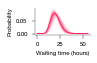

In [209]:
# waiting time distribution example
from scipy.stats import erlang

# draw mean rate from a Gaussian (mean and std)
theta = np.random.normal(0.05, 0.0025, 10000)
x = np.linspace(0.0, 55.0, num=1000)

# construct a Erlang waiting time distr.
erlang_steps = np.random.choice([12, 13, 14, 15, 16, 17, 18], 10000, p=[0.05, 0.1, 0.2, 0.3, 0.2, 0.1, 0.05])
erlang_samples = np.array([erlang.pdf(x, a=erlang_steps[i],
                                   scale=1/(erlang_steps[i]*theta[i])) for i in range(len(theta))])
y = erlang_samples

y_997_lower = np.percentile(y, 0.15, axis=0)
y_95_lower = np.percentile(y, 2.5, axis=0)
y_68_lower = np.percentile(y, 16.0, axis=0)
y_median = np.percentile(y, 50.0, axis=0)
y_68_upper = np.percentile(y, 84.0, axis=0)
y_95_upper = np.percentile(y, 97.5, axis=0)
y_997_upper = np.percentile(y, 99.85, axis=0)

plt.rcParams.update({'figure.figsize': (1.0, 0.5)})
plt.figure()
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)

# adapted from framework plotting methods
# if plot_data:
#     data.events_find_all()
#     data_act = np.array([tup[1] for tup in data.event_all_first_cell_type_conversion if tup[0]])

#     plt.hist(data_act - 1e-06, bins=data.data_time_values,
#              color='black', alpha=0.1,
#              density=True, histtype='stepfilled')


plt.fill_between(x, y_997_lower, y_95_lower, color=cwact, alpha=0.2, linewidth=0.0, zorder=100)
plt.fill_between(x, y_95_lower, y_68_lower, color=cwact, alpha=0.4, linewidth=0.0, zorder=100)
plt.fill_between(x, y_68_lower, y_median, color=cwact, alpha=0.6, linewidth=0.0, zorder=100)

plt.fill_between(x, y_median, y_68_upper, color=cwact, alpha=0.6, linewidth=0.0, zorder=100)
plt.fill_between(x, y_68_upper, y_95_upper, color=cwact, alpha=0.4, linewidth=0.0, zorder=100)
plt.fill_between(x, y_95_upper, y_997_upper, color=cwact, alpha=0.2, linewidth=0.0, zorder=100)

plt.plot(x, y_median, color=cwact, lw=1, zorder=200)

# ax.set_yticklabels([])
# ax.set_xticklabels([])
# ax.tick_params(axis=u'both', which=u'both',length=0)

plt.ylabel('Probability')
plt.xlabel('Waiting time (hours)')
plt.savefig('paper_figures/memocell_waiting_time.pdf', bbox_inches='tight') # pdf, png

1.09


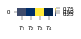

In [236]:
# posterior probability heatmaps
# topology
model_probs = np.array([0.2, 0.07, 0.8, 0.02])
steps = ['$T_1$', '$T_2$', '$T_3$', '$T_4$']
print(np.sum(model_probs))
plt.figure(figsize=(0.8,0.15))
df = pd.DataFrame(np.array([model_probs]), columns=steps) # , index=rows
sns.heatmap(df, cmap='cividis', annot=False, fmt='.0f') # 'plasma' # annot=True
plt.yticks(rotation=0, va='center')
plt.xticks(rotation=0)
plt.savefig('paper_figures/memocell_probs_topology.pdf', bbox_inches='tight')

0.9999999999999999


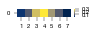

In [231]:
# posterior probability heatmaps
# steps
model_probs = np.array([0.04, 0.1, 0.25, 0.3, 0.2, 0.1, 0.01])
steps = np.array(range(1, len(model_probs)+1))
print(np.sum(model_probs))
plt.figure(figsize=(1.2,0.15))
df = pd.DataFrame(np.array([model_probs]), columns=steps) # , index=rows
sns.heatmap(df, cmap='cividis', annot=False, fmt='.0f') # 'plasma' # annot=True
plt.yticks(rotation=0, va='center')
plt.xticks(rotation=0)
plt.savefig('paper_figures/memocell_probs_steps.pdf', bbox_inches='tight')

##### schemes with topology analysis

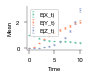

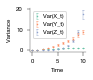

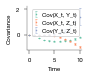

In [5]:
data = pickle.load(open('topology_files/data_pathway_topology_n1000_t11_2.pickle', 'rb'))

plt.rcParams.update({'figure.figsize': (1.0, 0.8)})
me.plots.data_mean_plot(data)
me.plots.data_variance_plot(data)
me.plots.data_covariance_plot(data)

In [285]:
data.data_time_values[(0, 5, 10),]

array([ 0.,  5., 10.])

In [11]:
data.data_counts[:200, :, (0, 5, 10)].shape

(200, 3, 3)

In [43]:
# construct a new data set with less repeats
data_less = me.Data('data_less')
data_less.load(data.data_variables,
            data.data_time_values[(0, 5, 10),],
            data.data_counts[350:450, :, (0, 5, 10)],
            basic_sigma=data.data_basic_sigma)

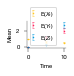

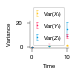

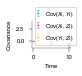

In [44]:
plt.rcParams.update({'figure.figsize': (0.7, 0.5)})
settings = {
    'X_t': {'label': 'E$(X_t)$', 'color': ctopx},
    'Y_t': {'label': 'E$(Y_t)$', 'color': ctopy},
    'Z_t': {'label': 'E$(Z_t)$', 'color': ctopz},
}
me.plots.data_mean_plot(data_less, settings=settings,
                       save='paper_figures/memocell_data_mean.pdf')
settings = {
    ('X_t', 'X_t'): {'label': 'Var$(X_t)$', 'color': ctopx},
    ('Y_t', 'Y_t'): {'label': 'Var$(Y_t)$', 'color': ctopy},
    ('Z_t', 'Z_t'): {'label': 'Var$(Z_t)$', 'color': ctopz}
}
me.plots.data_variance_plot(data_less, settings=settings,
                           save='paper_figures/memocell_data_var.pdf')
settings = {
    ('X_t', 'Y_t'): {'label': 'Cov$(X_t, Y_t)$', 'color': ctopz},
    ('X_t', 'Z_t'): {'label': 'Cov$(X_t, Z_t)$', 'color': ctopy},
    ('Y_t', 'Z_t'): {'label': 'Cov$(Y_t, Z_t)$', 'color': ctopx}
}
me.plots.data_covariance_plot(data_less, settings=settings)

In [45]:
# true network
t = [
        {'start': 'X_t', 'end': 'Y_t', 'rate_symbol': 'dxy', 'type': 'S -> E', 'reaction_steps': 4},
        {'start': 'Y_t', 'end': 'Z_t', 'rate_symbol': 'dyz', 'type': 'S -> E', 'reaction_steps': 2},
        {'start': 'X_t', 'end': 'X_t', 'rate_symbol': 'lx', 'type': 'S -> S + S', 'reaction_steps': 5},
        {'start': 'Y_t', 'end': 'Y_t', 'rate_symbol': 'ly', 'type': 'S -> S + S', 'reaction_steps': 1},
        {'start': 'Z_t', 'end': 'Z_t', 'rate_symbol': 'lz', 'type': 'S -> S + S', 'reaction_steps': 3},
        ]

net = me.Network('net_true')
net.structure(t)

# estimate true model on sparse data
variables = {'X_t': ('X_t', ), 'Y_t': ('Y_t', ), 'Z_t': ('Z_t', )}
initial_values = {'X_t': 1, 'Y_t': 0, 'Z_t': 0}
theta_bounds = {'dxy': (0.0, 1.0), 'dyz': (0.0, 1.0), 'lx': (0.0, 1.0), 'ly': (0.0, 1.0), 'lz': (0.0, 1.0)}

est = me.Estimation('est_data_less', net, data_less)
est.estimate(variables, initial_values, theta_bounds)

In [46]:
est.bay_est_params_median

array([0.36050741, 0.15571706, 0.18715817, 0.31824373, 0.39823044])

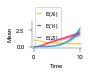

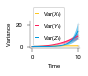

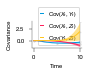

In [48]:
plt.rcParams.update({'figure.figsize': (0.9, 0.5)})
settings = {
    'X_t': {'label': 'E$(X_t)$', 'color': ctopx},
    'Y_t': {'label': 'E$(Y_t)$', 'color': ctopy},
    'Z_t': {'label': 'E$(Z_t)$', 'color': ctopz},
}
me.plots.est_bestfit_mean_plot(est, settings=settings,
                               y_lim=(None, 4.0),
                               save='paper_figures/memocell_meanfit.pdf')
settings = {
    ('X_t', 'X_t'): {'label': 'Var$(X_t)$', 'color': ctopx},
    ('Y_t', 'Y_t'): {'label': 'Var$(Y_t)$', 'color': ctopy},
    ('Z_t', 'Z_t'): {'label': 'Var$(Z_t)$', 'color': ctopz}
}
me.plots.est_bestfit_variance_plot(est, data=True, settings=settings,
                                   save='paper_figures/memocell_varfit.pdf')
settings = {
    ('X_t', 'Y_t'): {'label': 'Cov$(X_t, Y_t)$', 'color': ctopz},
    ('X_t', 'Z_t'): {'label': 'Cov$(X_t, Z_t)$', 'color': ctopy},
    ('Y_t', 'Z_t'): {'label': 'Cov$(Y_t, Z_t)$', 'color': ctopx}
}
me.plots.est_bestfit_covariance_plot(est, data=True, settings=settings)

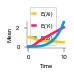

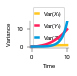

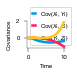

In [49]:
plt.rcParams.update({'figure.figsize': (0.7, 0.5)})
settings = {
    'X_t': {'label': 'E$(X_t)$', 'color': ctopx},
    'Y_t': {'label': 'E$(Y_t)$', 'color': ctopy},
    'Z_t': {'label': 'E$(Z_t)$', 'color': ctopz},
}
me.plots.est_bestfit_mean_plot(est, settings=settings, data=False,
                               cred=False,
                               save='paper_figures/memocell_model_mean.pdf')
settings = {
    ('X_t', 'X_t'): {'label': 'Var$(X_t)$', 'color': ctopx},
    ('Y_t', 'Y_t'): {'label': 'Var$(Y_t)$', 'color': ctopy},
    ('Z_t', 'Z_t'): {'label': 'Var$(Z_t)$', 'color': ctopz}
}
me.plots.est_bestfit_variance_plot(est, data=False,
                                   cred=False,
                                   settings=settings,
                                  save='paper_figures/memocell_model_var.pdf')
settings = {
    ('X_t', 'Y_t'): {'label': 'Cov$(X_t, Y_t)$', 'color': ctopz},
    ('X_t', 'Z_t'): {'label': 'Cov$(X_t, Z_t)$', 'color': ctopy},
    ('Y_t', 'Z_t'): {'label': 'Cov$(Y_t, Z_t)$', 'color': ctopx}
}
me.plots.est_bestfit_covariance_plot(est, data=False, 
                                     cred=False,
                                     settings=settings,
                                    save='paper_figures/memocell_model_cov.pdf')

In [117]:
# count data
# => ideally as dots
variables = {'X_t': ('X_t', ), 'Y_t': ('Y_t', ), 'Z_t': ('Z_t', )}
initial_values = {'X_t': 1, 'Y_t': 0, 'Z_t': 0}
theta_values = {'dxy': 0.4, 'dyz': 0.15, 'lx': 0.2, 'ly': 0.3, 'lz': 0.4}
time_values = np.linspace(0.0, 10.0, num=3)

sim = me.Simulation(net)
sim.simulate('gillespie', variables, initial_values, theta_values, time_values)

[array([ 0.,  5., 10.]),
 array([[1., 0., 0.],
        [0., 2., 0.],
        [0., 0., 3.]])]

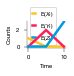

In [118]:
plt.rcParams.update({'figure.figsize': (0.7, 0.5)})
settings = {
    'X_t': {'label': 'E$(X_t)$', 'color': ctopx},
    'Y_t': {'label': 'E$(Y_t)$', 'color': ctopy},
    'Z_t': {'label': 'E$(Z_t)$', 'color': ctopz},
}
me.plots.sim_counts_plot(sim, settings=settings)

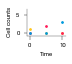

In [120]:
plt.rcParams.update({'figure.figsize': (0.7, 0.5)})
plt.figure()
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)

plt.scatter(sim.sim_time_values, 
            sim.sim_gillespie_res[1][0, :],
           color=ctopx, s=3)
plt.scatter(sim.sim_time_values, 
            sim.sim_gillespie_res[1][1, :],
           color=ctopy, s=3)
plt.scatter(sim.sim_time_values, 
            sim.sim_gillespie_res[1][2, :],
           color=ctopz, s=3)

plt.xlim(-1, 11)
plt.ylim(-0.75, 6+0.75)
plt.xlabel('Time')
plt.ylabel('Cell counts')
plt.savefig('paper_figures/memocell_data2.pdf', bbox_inches='tight')

In [85]:
# simulation data
# => ideally as steps (do with high time resolution)
variables = {'X_t': ('X_t', ), 'Y_t': ('Y_t', ), 'Z_t': ('Z_t', )}
initial_values = {'X_t': 1, 'Y_t': 0, 'Z_t': 0}
theta_values = {'dxy': 0.4, 'dyz': 0.15, 'lx': 0.2, 'ly': 0.3, 'lz': 0.4}
time_values = np.linspace(0.0, 10.0, num=10000)

sim = me.Simulation(net)
sim.simulate('gillespie', variables, initial_values, theta_values, time_values)

[array([0.00000000e+00, 1.00010001e-03, 2.00020002e-03, ...,
        9.99799980e+00, 9.99899990e+00, 1.00000000e+01]),
 array([[1., 1., 1., ..., 0., 0., 0.],
        [0., 0., 0., ..., 1., 1., 1.],
        [0., 0., 0., ..., 6., 6., 6.]])]

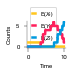

In [86]:
plt.rcParams.update({'figure.figsize': (0.7, 0.5)})
settings = {
    'X_t': {'label': 'E$(X_t)$', 'color': ctopx},
    'Y_t': {'label': 'E$(Y_t)$', 'color': ctopy},
    'Z_t': {'label': 'E$(Z_t)$', 'color': ctopz},
}
me.plots.sim_counts_plot(sim, settings=settings,
                        save='paper_figures/memocell_sim2.pdf')

##### off notes

In [242]:
np.var(np.array([10, 15, 8]) * 0.5)

2.1666666666666665

In [251]:
t = [
        {'start': 'X_t', 'end': 'X_t', 'rate_symbol': 'l', 'type': 'S -> S + S', 'reaction_steps': 1}
        ]

net = me.Network('net_div_g1')
net.structure(t)

num_iter = 3
initial_values = {'X_t': 1}
theta_values = {'l': 2.3}
time_values = np.linspace(0.0, 1.0, num=10000, endpoint=True)
variables = {'X_t': ('X_t', )}


sim = me.Simulation(net)
res = sim.simulate('moments', variables, initial_values, theta_values, time_values)


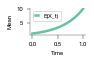

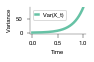

In [253]:
me.plots.sim_mean_plot(sim)
me.plots.sim_variance_plot(sim)

In [260]:
res[0]

array([[1.        , 1.00023005, 1.00046015, ..., 9.96959493, 9.97188843,
        9.97418246]])

In [255]:
print(sim.sim_moments.moment_eqs)
print(sim.sim_moments.moment_order_hidden)

['1.0*m[0]*theta[0]', '2.0*m[0]*theta[0] + 2.0*m[1]*theta[0]']
[[('Z_0__centric',)], [('Z_0__centric', 'Z_0__centric')]]
